In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [123]:
# print python module versions
print('numpy version      ', np.__version__)
print('pandas version     ', pd.__version__)
print('seaborn version    ', sns.__version__)
import matplotlib; print('matplotlib version ', matplotlib.__version__)

numpy version       1.20.1
pandas version      1.2.1
seaborn version     0.11.1
matplotlib version  3.3.2


In [4]:
data_dir = os.path.abspath('/Users/KRS228/data')

In [5]:
# define the filepath for the post mortem connectivi
postmortem_matrix_fpath = os.path.join(data_dir, 
                            'postmortem/analysis/dsi_studio/',
                            'IC_subdivisions',
                            'whole_brain_ROIs_cg.txt')

In [73]:
mgh_matrix_fpath = os.path.join(data_dir, 
                            'mgh_dwi_760um/regions_IC',
                            'whole_brain_ROIs_cg.txt')

In [74]:
#matrix_fpath = postmortem_matrix_fpath
matrix_fpath = mgh_matrix_fpath

In [95]:
# load the connectivity matrix into a pandas dataframe
df = pd.read_csv(matrix_fpath, header=1, delimiter='\t')

In [96]:
# get rid of weird column at the end
df = df.drop(columns=df.columns[-1])

In [97]:
df.iloc[:,:]

,data,data.1,LL_IC,brachium_IC,commissure_IC,L_IC_central,L_IC_dorsal,L_IC_external,R_IC_central,R_IC_dorsal,R_IC_external
0,2108,LL_IC,0,184,104,50,10,256,176,74,200
1,396,brachium_IC,184,0,4,0,0,2,2,2,4
2,352,commissure_IC,104,4,0,6,4,20,2,36,0
3,168,L_IC_central,50,0,6,0,2,24,0,2,0
4,60,L_IC_dorsal,10,0,4,2,0,10,0,4,0
5,628,L_IC_external,256,2,20,24,10,0,2,0,0
6,516,R_IC_central,176,2,2,0,0,2,0,50,26
7,356,R_IC_dorsal,74,2,36,2,4,0,50,0,10
8,480,R_IC_external,200,4,0,0,0,0,26,10,0


In [98]:
# make df version without total streamlines, data.1 column
plot_df = df.iloc[:,2:]

In [99]:
# get the max value in the whole dataframe for scaling purposes
df_max = plot_df.to_numpy().max()

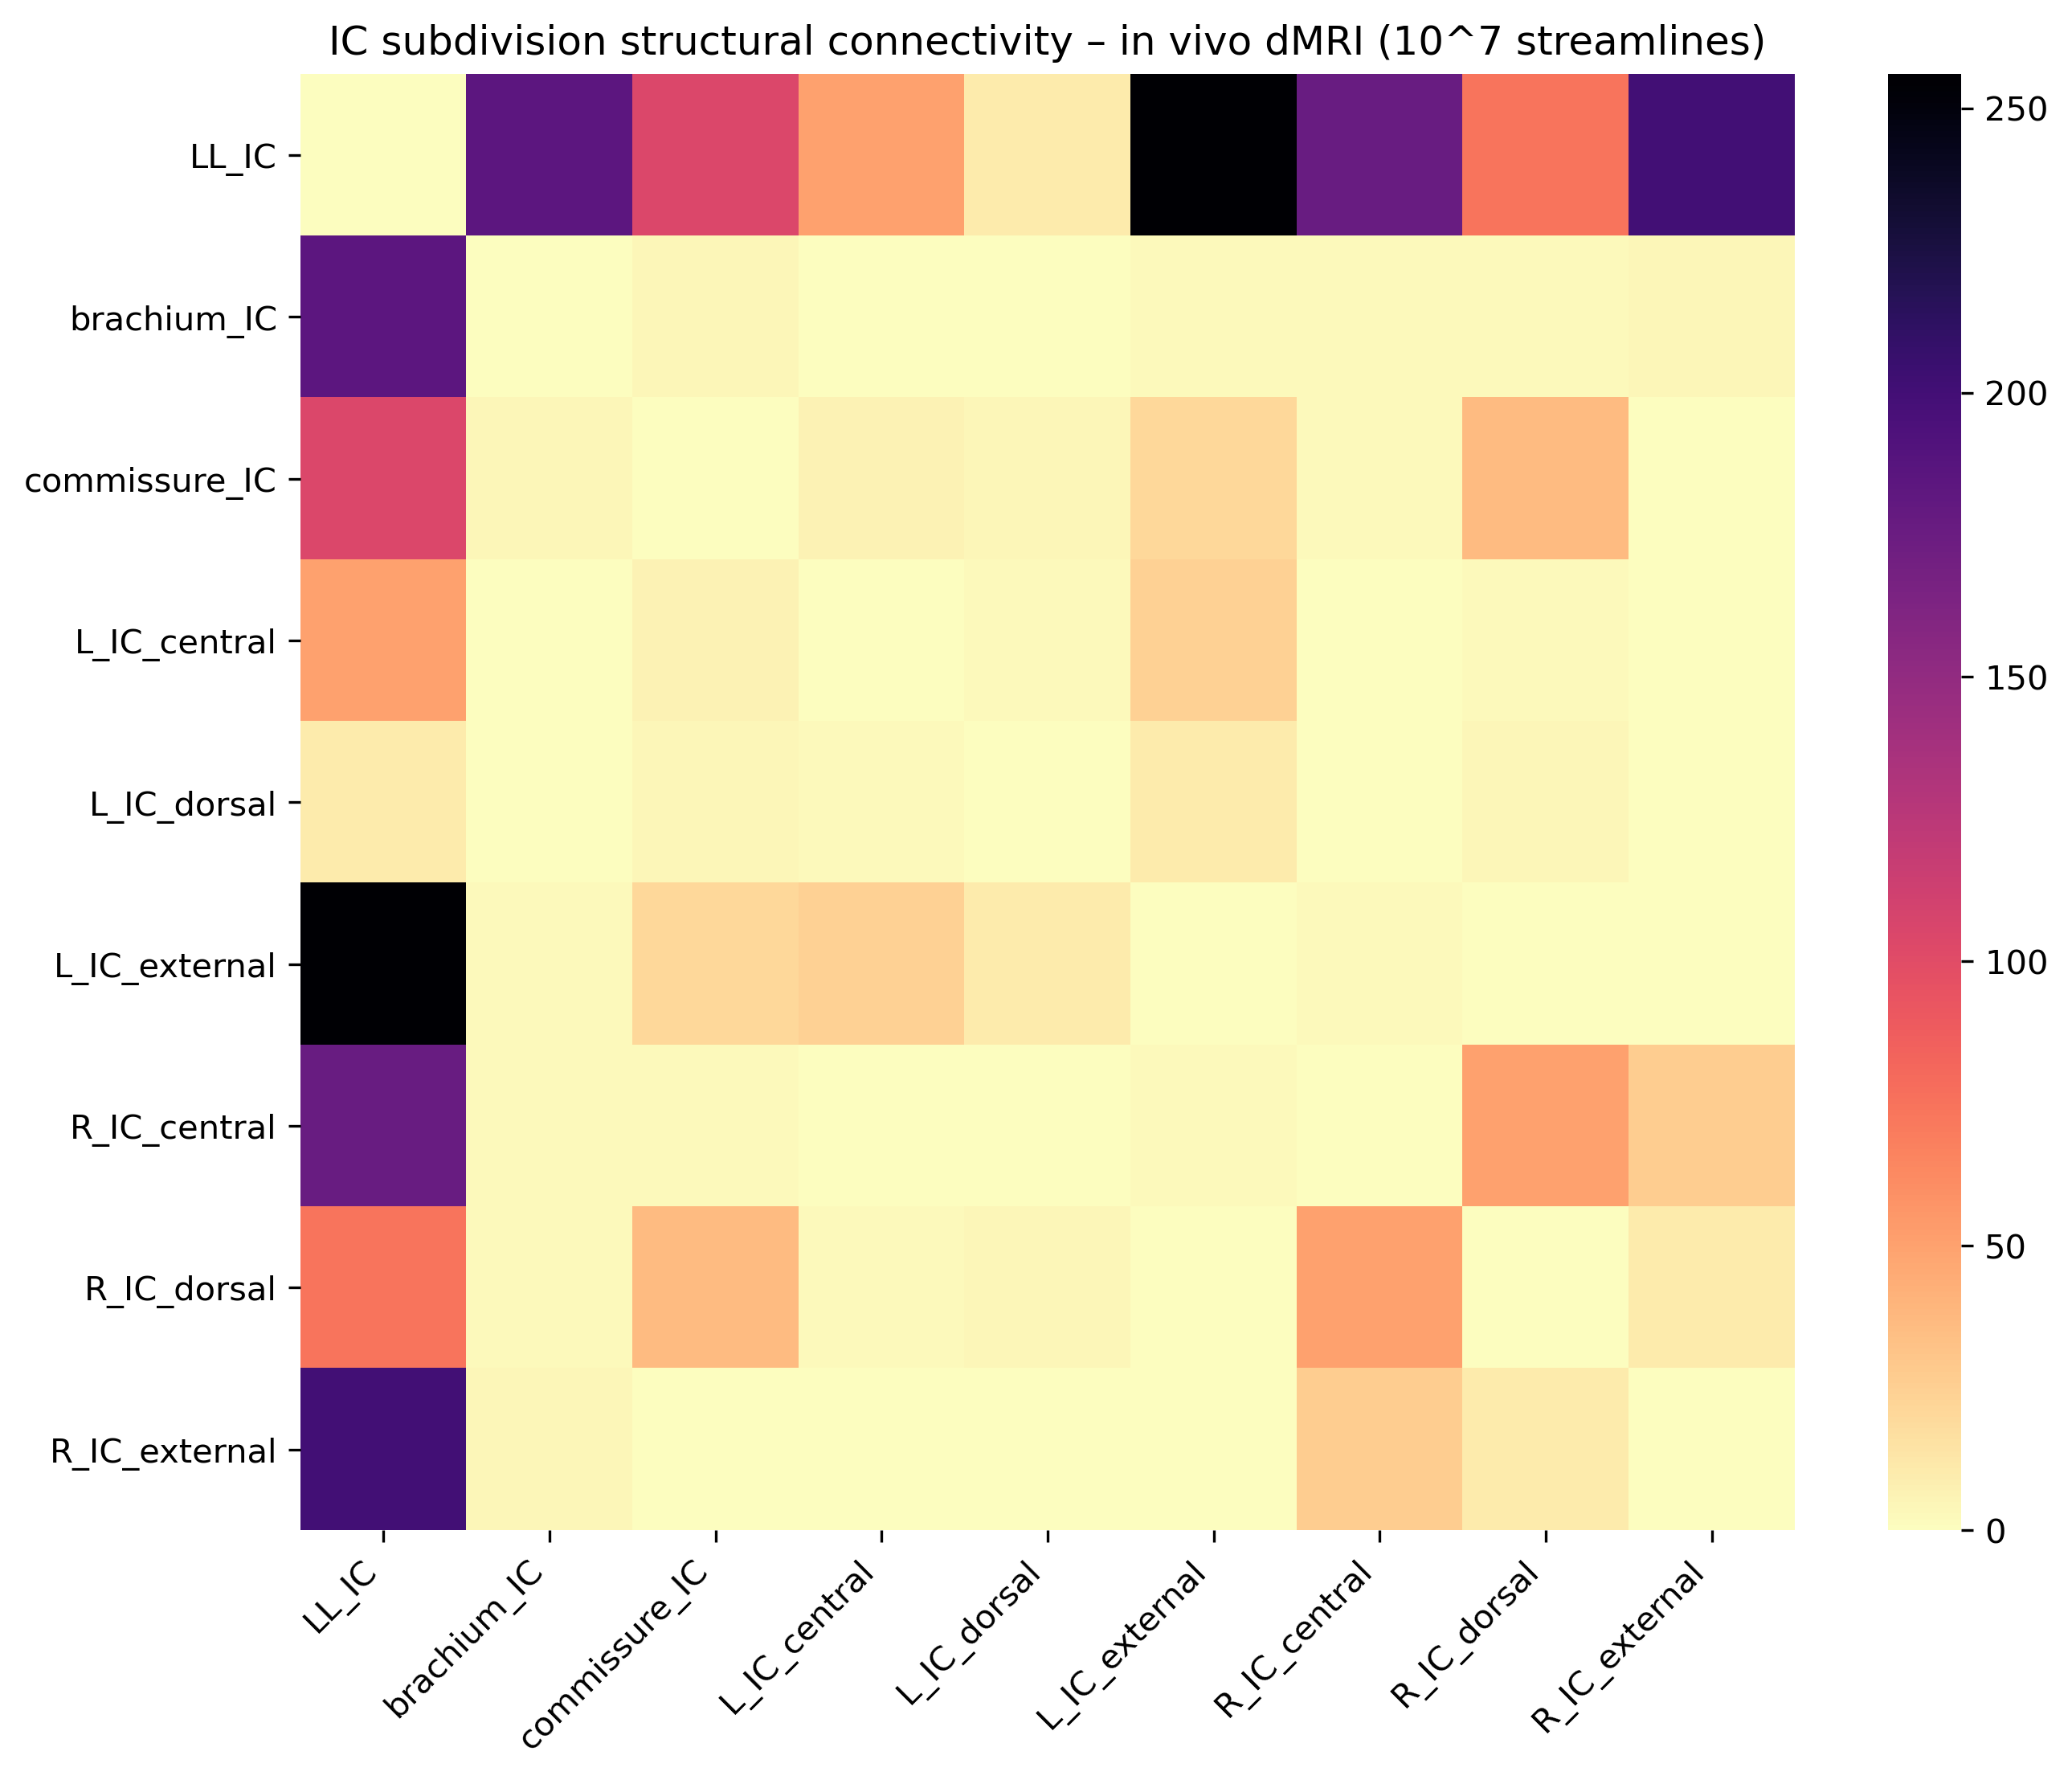

In [100]:
f, ax = plt.subplots(figsize=(10, 8), dpi=300)
sns.heatmap(plot_df, ax=ax, cmap="magma_r",
            xticklabels=plot_df, yticklabels=plot_df,  
            #norm=colors.LogNorm(vmin=1, vmax=df_max),
            #vmax=5000,
           )
#ax.set_title('IC subdivision structural connectivity – post mortem dMRI (10^7 streamlines)');
ax.set_title('IC subdivision structural connectivity – in vivo dMRI (10^7 streamlines)');
ax.set_xticklabels(plot_df, ha='right', rotation=45);


# save the figure
f.savefig('in vivo_IC_subdivision_conn_matrix.png')

## plot values per WM region

In [102]:
norm_df = df.copy()
norm_df.iloc[:,2:] = norm_df.iloc[:,2:].div(norm_df['data'], axis=0)

In [103]:
norm_df

,data,data.1,LL_IC,brachium_IC,commissure_IC,L_IC_central,L_IC_dorsal,L_IC_external,R_IC_central,R_IC_dorsal,R_IC_external
0,2108,LL_IC,0.000000,0.087287,0.049336,0.023719,0.004744,0.121442,0.083491,0.035104,0.094877
1,396,brachium_IC,0.464646,0.000000,0.010101,0.000000,0.000000,0.005051,0.005051,0.005051,0.010101
2,352,commissure_IC,0.295455,0.011364,0.000000,0.017045,0.011364,0.056818,0.005682,0.102273,0.000000
3,168,L_IC_central,0.297619,0.000000,0.035714,0.000000,0.011905,0.142857,0.000000,0.011905,0.000000
4,60,L_IC_dorsal,0.166667,0.000000,0.066667,0.033333,0.000000,0.166667,0.000000,0.066667,0.000000
5,628,L_IC_external,0.407643,0.003185,0.031847,0.038217,0.015924,0.000000,0.003185,0.000000,0.000000
6,516,R_IC_central,0.341085,0.003876,0.003876,0.000000,0.000000,0.003876,0.000000,0.096899,0.050388
7,356,R_IC_dorsal,0.207865,0.005618,0.101124,0.005618,0.011236,0.000000,0.140449,0.000000,0.028090
8,480,R_IC_external,0.416667,0.008333,0.000000,0.000000,0.000000,0.000000,0.054167,0.020833,0.000000


In [104]:
col_list = norm_df['data.1']

In [105]:
l_mask = norm_df.columns.str.startswith('L_')
r_mask = norm_df.columns.str.startswith('R_')

In [106]:
left_df.index.str.startswith('L_')

array([False, False, False,  True,  True,  True, False, False, False])

In [107]:
left_df = norm_df.loc[:,l_mask]
left_df.set_index(col_list, inplace=True)

left_wm_df = left_df.loc[(left_df.index.str.startswith('LL_')) | 
                         (left_df.index.str.startswith('brachium_')) |
                         (left_df.index.str.startswith('commissure_'))]

# melt into a tall dataset
melt_left_df = left_wm_df.melt(var_name='ROI', value_name='streamline proportion', 
                                     ignore_index=False).reset_index()
melt_left_df.rename(columns={'data.1':'white matter seed'}, inplace=True)

In [108]:
# check the melted dataframe
melt_left_df

,white matter seed,ROI,streamline proportion
0,LL_IC,L_IC_central,0.023719
1,brachium_IC,L_IC_central,0.000000
2,commissure_IC,L_IC_central,0.017045
3,LL_IC,L_IC_dorsal,0.004744
4,brachium_IC,L_IC_dorsal,0.000000
5,commissure_IC,L_IC_dorsal,0.011364
6,LL_IC,L_IC_external,0.121442
7,brachium_IC,L_IC_external,0.005051
8,commissure_IC,L_IC_external,0.056818


In [109]:
# now do it for the right structures
right_df = norm_df.loc[:,r_mask]
right_df.set_index(col_list, inplace=True)

right_wm_df = right_df.loc[(left_df.index.str.startswith('LL_')) | 
                           (left_df.index.str.startswith('brachium_')) |
                           (left_df.index.str.startswith('commissure_'))]

# melt into a tall dataset
melt_right_df = right_wm_df.melt(var_name='ROI', value_name='streamline proportion', 
                                     ignore_index=False).reset_index()
melt_right_df.rename(columns={'data.1':'white matter seed'}, inplace=True)

In [110]:
# concatenate into a single tall dataset
melt_df = pd.concat([melt_left_df, melt_right_df])

In [111]:
melt_df

,white matter seed,ROI,streamline proportion
0,LL_IC,L_IC_central,0.023719
1,brachium_IC,L_IC_central,0.000000
2,commissure_IC,L_IC_central,0.017045
3,LL_IC,L_IC_dorsal,0.004744
4,brachium_IC,L_IC_dorsal,0.000000
5,commissure_IC,L_IC_dorsal,0.011364
6,LL_IC,L_IC_external,0.121442
7,brachium_IC,L_IC_external,0.005051
8,commissure_IC,L_IC_external,0.056818
0,LL_IC,R_IC_central,0.083491


In [112]:
# plot
f,axes=plt.subplots(1, 1, figsize=(8,8), dpi=1000)
sns.barplot(data=melt_df, x='ROI', y='streamline proportion', hue='white matter seed',ax=axes, palette='Set2')
axes.tick_params(rotation=45);
f.savefig('invivo_IC_subdivision_wm_barplot.png')